# Import libraries

In [1]:
import pandas as pd
import contractions
import re
import warnings
warnings.filterwarnings("ignore")

# Raw Recipes dataset

In [2]:
recipes = pd.read_csv('../dataset/RAW_recipes.csv')

In [3]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [4]:
recipes.shape

(231637, 12)

In [5]:
recipes.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [6]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [7]:
# Missing values in terms of percentage
recipes.isnull().sum() / len(recipes) * 100

name              0.000432
id                0.000000
minutes           0.000000
contributor_id    0.000000
submitted         0.000000
tags              0.000000
nutrition         0.000000
n_steps           0.000000
steps             0.000000
description       2.149484
ingredients       0.000000
n_ingredients     0.000000
dtype: float64

In [8]:
# drop the rows with missing values
recipes.dropna(inplace=True)

<Axes: >

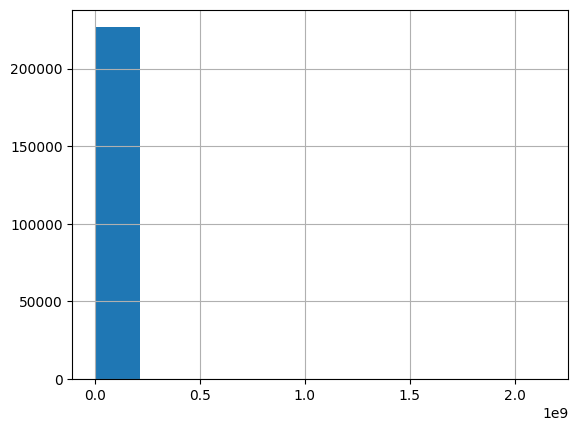

In [9]:
# plot the distribution of minutes to prepare
recipes.minutes.hist()

In [10]:
# There seems to be some outliers in the minutes column
min_time = recipes.minutes.min()
max_time = recipes.minutes.max()
print("Min time: ", min_time)
print("Max time: ", max_time)

Min time:  0
Max time:  2147483647


In [11]:
# recipes that take more than 4 hours to prepare
recipes[recipes.minutes > 60 * 4]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
11,better than sex strawberries,42198,1460,41531,2002-10-03,"['weeknight', 'time-to-make', 'course', 'main-...","[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]",8,['crush vanilla wafers into fine crumbs and li...,simple but sexy. this was in my local newspape...,"['vanilla wafers', 'butter', 'powdered sugar',...",7
12,better then bush s baked beans,67547,2970,85627,2003-07-26,"['weeknight', 'time-to-make', 'course', 'main-...","[462.4, 28.0, 214.0, 69.0, 14.0, 29.0, 23.0]",9,['in a very large sauce pan cover the beans an...,i'd have to say that this is a labor of love d...,"['great northern bean', 'chicken bouillon cube...",13
13,boat house collard greens,107517,525,137696,2005-01-03,"['time-to-make', 'main-ingredient', 'preparati...","[315.8, 0.0, 202.0, 9.0, 6.0, 0.0, 21.0]",7,"['put prepared greens in large pot', 'add wate...",my boss gave me this recipe several years ago....,"['collard greens', 'brown sugar', 'molasses', ...",7
15,chicken lickin good pork chops,63986,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7
27,forgotten minestrone,47366,495,31871,2002-11-21,"['weeknight', 'time-to-make', 'course', 'main-...","[346.9, 24.0, 18.0, 42.0, 42.0, 30.0, 10.0]",5,"['in a slow cooker , combine the first nine in...",this recipe came from a,"['beef stew meat', 'water', 'tomatoes', 'beef ...",14
...,...,...,...,...,...,...,...,...,...,...,...,...
231232,zucchini marinata marinated zucchini salad,158292,255,47892,2006-03-02,"['time-to-make', 'course', 'main-ingredient', ...","[54.4, 5.0, 12.0, 0.0, 3.0, 2.0, 1.0]",9,['toss the thinly sliced zucchini with the lem...,a simple marinated zucchini salad from italy.\...,"['zucchini', 'lemon, juice of', 'garlic cloves...",7
231355,zucchini salsa canned,462992,2900,1403860,2011-08-24,"['time-to-make', 'course', 'main-ingredient', ...","[64.5, 0.0, 44.0, 53.0, 3.0, 0.0, 4.0]",27,['day one: in a large bowl or stainless pan co...,this is a delicious salsa recipe that my siste...,"['zucchini', 'sweet white onions', 'green bell...",17
231549,zucchini sausage brunch casserole,181958,540,89831,2006-08-15,"['time-to-make', 'course', 'main-ingredient', ...","[616.3, 73.0, 11.0, 70.0, 71.0, 113.0, 3.0]",15,"['grease a 13 x 9-inch baking dish', 'in a ski...",you can prepare this casserole the night befor...,"['italian sausages', 'green onions', 'fresh ga...",12
231573,zuni caf zucchini pickles,316950,2895,62264,2008-07-31,"['time-to-make', 'course', 'main-ingredient', ...","[343.6, 2.0, 284.0, 194.0, 5.0, 0.0, 25.0]",13,"['wash and trim the zucchini , then slice them...",refrigerator pickles for some of the zucchini ...,"['zucchini', 'yellow onion', 'kosher salt', 'c...",8


In [12]:
# drop the rows with minutes > 4 hours
recipes = recipes[recipes.minutes < 60 * 4]

<Axes: >

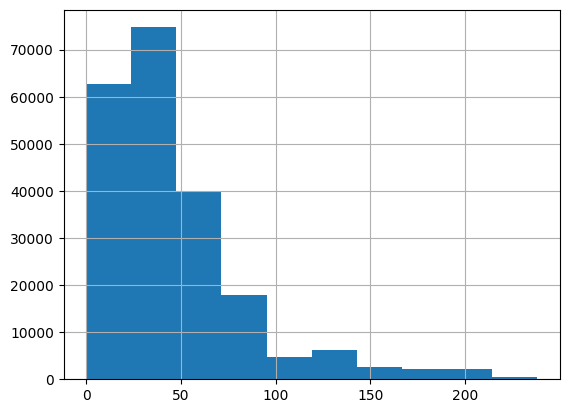

In [13]:
# plot the distribution of minutes to prepare, add a title and labels to the axes
recipes.minutes.hist()

In [14]:
# top 10 contributors
recipes.contributor_id.value_counts().head(10)

contributor_id
89831     2795
37449     2433
37779     2324
58104     1477
169430    1319
80353     1066
4470      1057
283251     962
305531     856
21752      856
Name: count, dtype: int64

<Axes: >

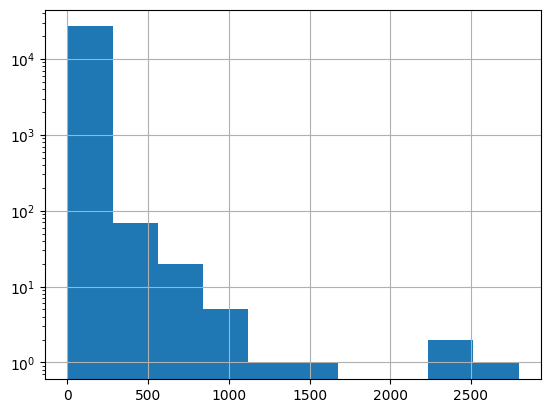

In [15]:
# distribution of recipes by contributor
recipes.contributor_id.value_counts().hist(log=True)

In [16]:
# number of unique contributors
print("Number of unique contributors: ", len(recipes.contributor_id.unique()))

Number of unique contributors:  26797


In [17]:
import re

# number of unique tags
tag_list = [tag_list.split(',') for tag_list in recipes.tags]
tag_list = [item.strip() for sublist in tag_list for item in sublist]
# remove special characters except - and " "
tag_list = [re.sub('[^A-Za-z0-9\s\-"]+', '', tag) for tag in tag_list]
print("Number of unique tags: ", len(set(tag_list)))

Number of unique tags:  512


In [18]:
# Frequency of each tag
from collections import Counter
tag_counts = Counter(tag_list)
pd.DataFrame(tag_counts.most_common(10), columns=['tag', 'count'])

,tag,count
0,preparation,213360
1,time-to-make,213211
2,course,201398
3,main-ingredient,156065
4,dietary,151449
5,easy,117299
6,occasion,105073
7,cuisine,84065
8,low-in-something,78704
9,60-minutes-or-less,68657


<Axes: xlabel='tag'>

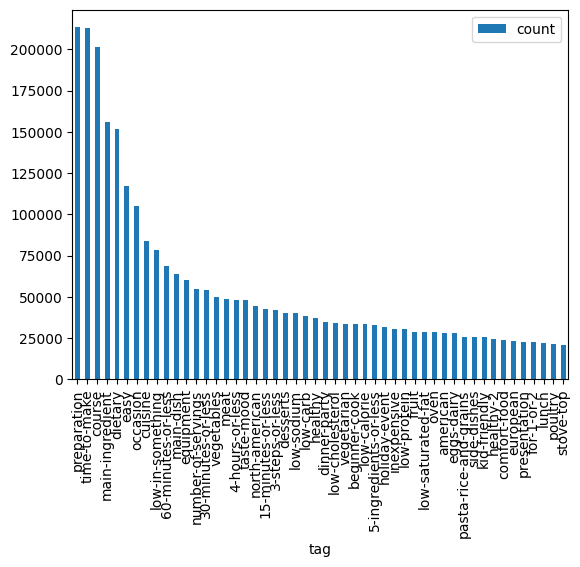

In [19]:
# plot the distribution of tags
pd.DataFrame(tag_counts.most_common(50), columns=['tag', 'count']).plot.bar(x='tag')

In [20]:
import numpy as np

# nutrition = (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat(PDV), carbohydrates(PDV))
# add new columns for calories, total_fat, sugar, sodium, protein, saturated_fat, carbohydrates 
# nutrition is string = '[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]'
# extract the numbers from the string using numpy
recipes['calories'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[0])
recipes['total_fat'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[1])
recipes['sugar'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[2])
recipes['sodium'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[3])
recipes['protein'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[4])
recipes['saturated_fat'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[5])
recipes['carbohydrates'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[6])

In [21]:
recipes.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [22]:
# drop the nutrition column
recipes.drop('nutrition', axis=1, inplace=True)

In [23]:
# find missing values in the nutrition columns
recipes.isnull().sum()

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
calories          0
total_fat         0
sugar             0
sodium            0
protein           0
saturated_fat     0
carbohydrates     0
dtype: int64

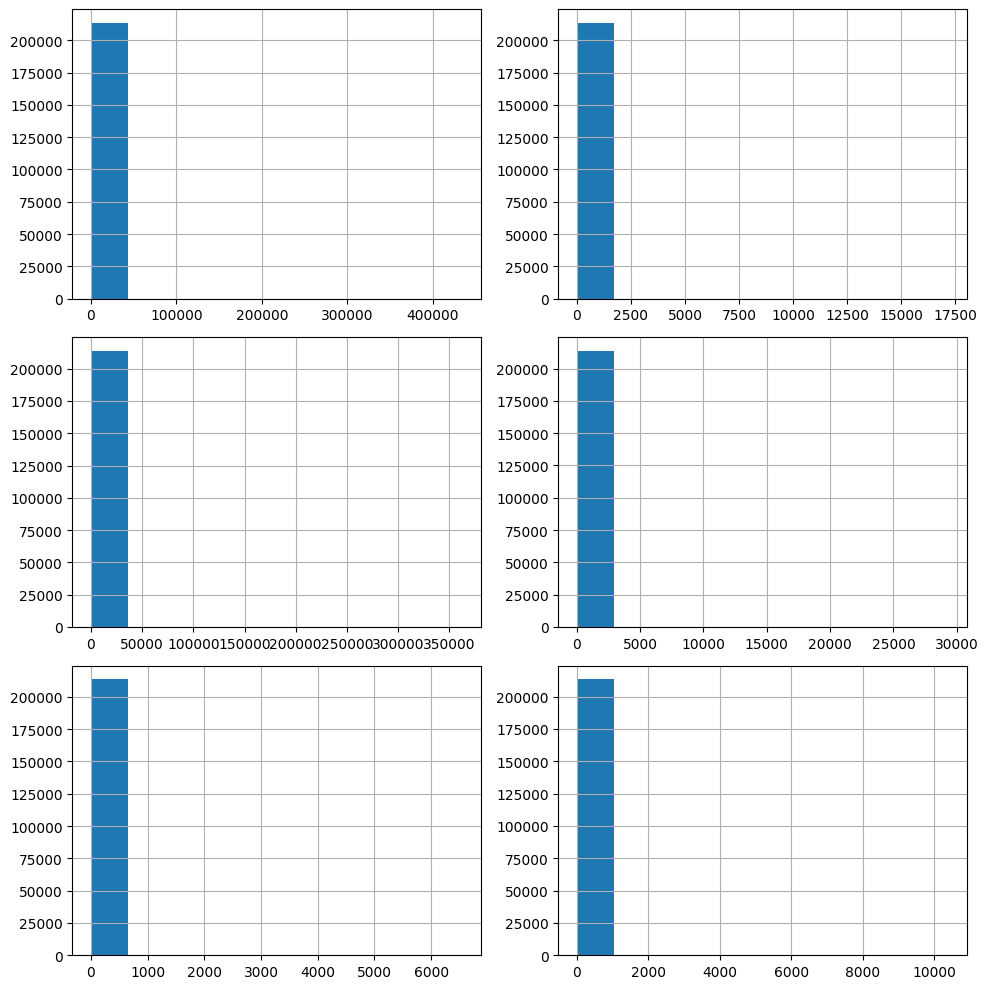

In [24]:
# print the distribution of each nutrition column in a single graph using matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
recipes.calories.hist(ax=axes[0, 0])
recipes.total_fat.hist(ax=axes[0, 1])
recipes.sugar.hist(ax=axes[1, 0])
recipes.sodium.hist(ax=axes[1, 1])
recipes.protein.hist(ax=axes[2, 0])
recipes.saturated_fat.hist(ax=axes[2, 1])

plt.tight_layout()
plt.show()

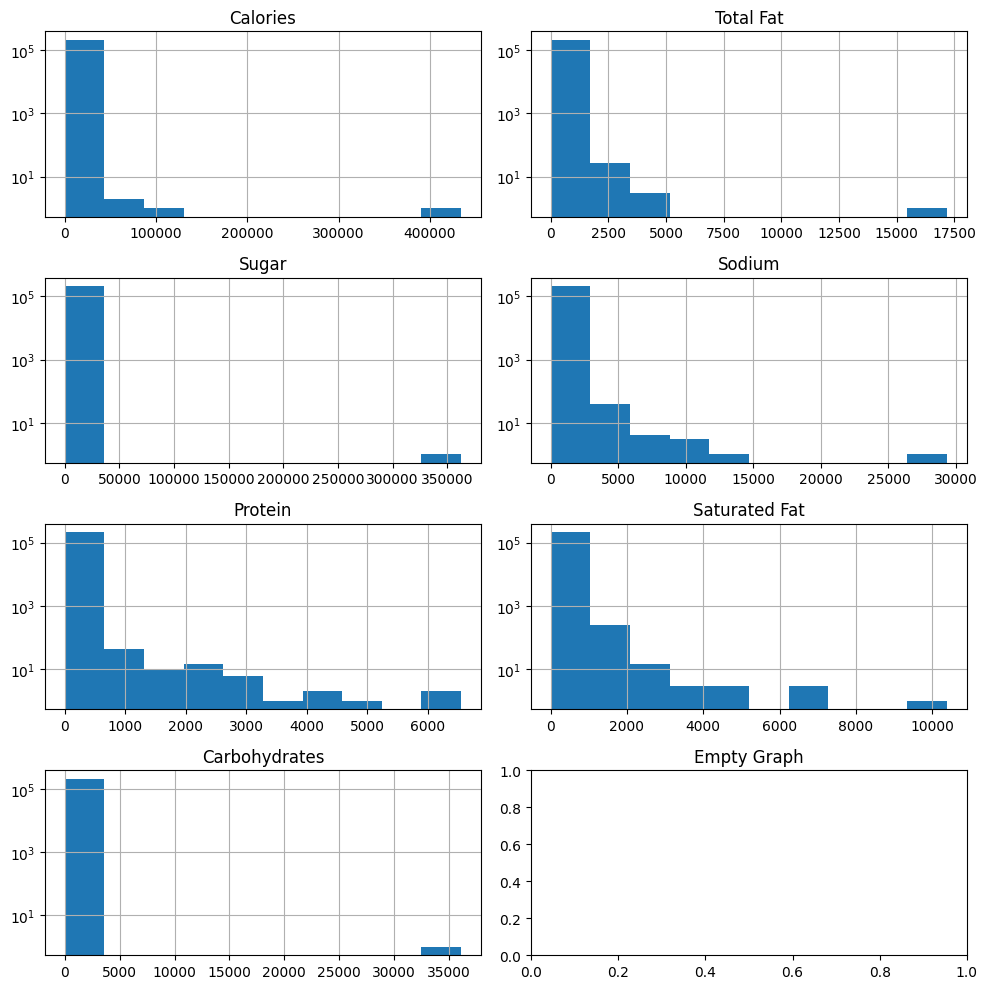

In [25]:
# there are some outliers in the data, remove them
# let's plot a log scale to see the distribution
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
recipes.calories.hist(ax=axes[0, 0], log=True)
axes[0, 0].set_title('Calories')
recipes.total_fat.hist(ax=axes[0, 1], log=True)
axes[0, 1].set_title('Total Fat')
recipes.sugar.hist(ax=axes[1, 0], log=True)
axes[1, 0].set_title('Sugar')
recipes.sodium.hist(ax=axes[1, 1], log=True)
axes[1, 1].set_title('Sodium')
recipes.protein.hist(ax=axes[2, 0], log=True)
axes[2, 0].set_title('Protein')
recipes.saturated_fat.hist(ax=axes[2, 1], log=True)
axes[2, 1].set_title('Saturated Fat')
recipes.carbohydrates.hist(ax=axes[3, 0], log=True)
axes[3, 0].set_title('Carbohydrates')
axes[3, 1].set_title('Empty Graph')
plt.tight_layout()
plt.show()

In [26]:
recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
count,213571.000000,213571.000000,2.135710e+05,213571.000000,213571.000000,213571.000000,213571.000000,213571.000000,213571.000000,213571.000000,213571.000000,213571.000000
mean,226482.644727,46.079215,5.481991e+06,9.718356,9.020284,465.160148,35.523447,82.236502,28.759139,33.389641,44.890238,15.361941
std,139735.443442,38.791683,9.912447e+07,5.858686,3.707442,1204.751560,77.149663,822.274028,122.057974,56.074668,95.709627,83.990826
min,40.000000,0.000000,2.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106268.500000,20.000000,5.828200e+04,6.000000,6.000000,172.300000,8.000000,9.000000,5.000000,6.000000,7.000000,4.000000
50%,212791.000000,35.000000,1.820100e+05,9.000000,9.000000,309.200000,20.000000,24.000000,14.000000,18.000000,22.000000,9.000000
75%,337278.500000,60.000000,4.112440e+05,12.000000,11.000000,513.100000,40.000000,67.000000,32.000000,49.000000,52.000000,16.000000
max,537716.000000,238.000000,2.002290e+09,145.000000,43.000000,434360.200000,17183.000000,362729.000000,29338.000000,6552.000000,10395.000000,36098.000000


In [27]:
# remove values of nutrition columns that are more than 3 standard deviations away from the mean
recipes = recipes[np.abs(recipes.calories - recipes.calories.mean()) <= (3 * recipes.calories.std())]
recipes = recipes[np.abs(recipes.total_fat - recipes.total_fat.mean()) <= (3 * recipes.total_fat.std())]
recipes = recipes[np.abs(recipes.sugar - recipes.sugar.mean()) <= (3 * recipes.sugar.std())]
recipes = recipes[np.abs(recipes.sodium - recipes.sodium.mean()) <= (3 * recipes.sodium.std())]
recipes = recipes[np.abs(recipes.protein - recipes.protein.mean()) <= (3 * recipes.protein.std())]
recipes = recipes[np.abs(recipes.saturated_fat - recipes.saturated_fat.mean()) <= (3 * recipes.saturated_fat.std())]
recipes = recipes[np.abs(recipes.carbohydrates - recipes.carbohydrates.mean()) <= (3 * recipes.carbohydrates.std())]

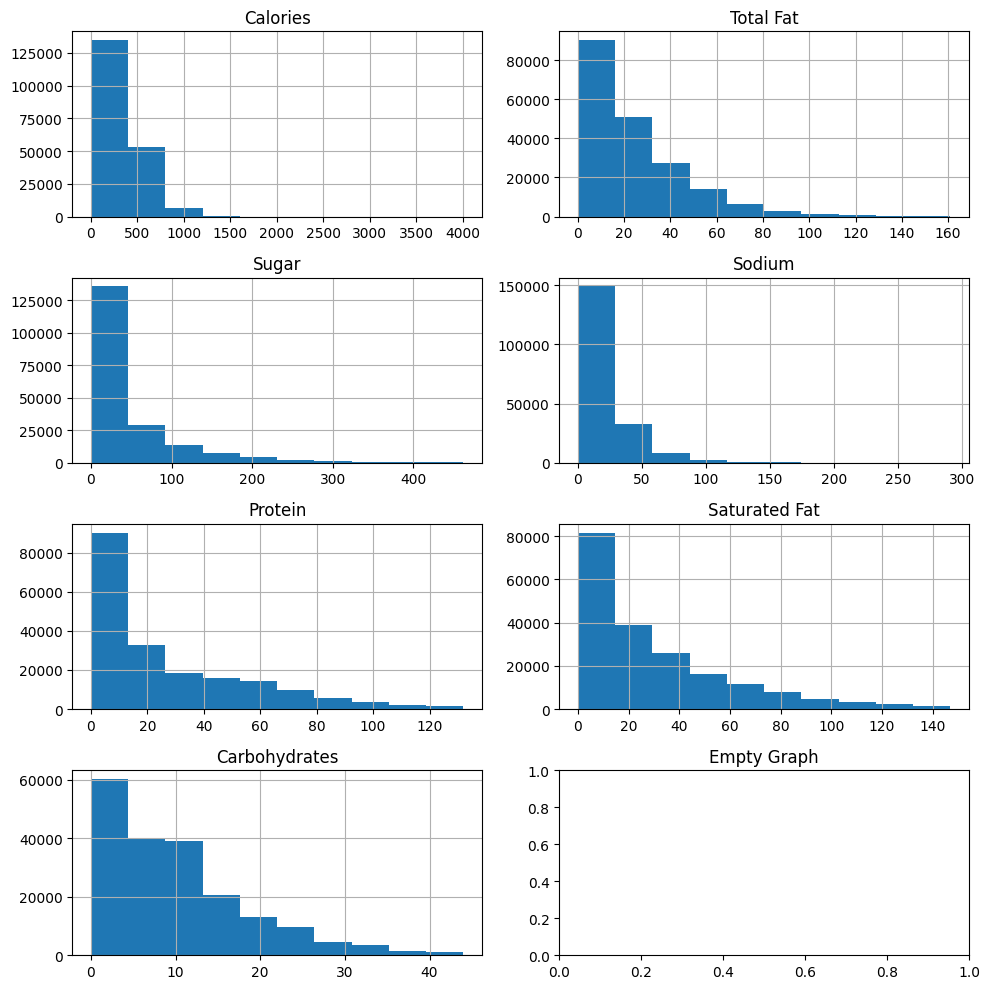

In [29]:
# plot the distribution of each nutrition column in a single graph using matplotlib
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
recipes.calories.hist(ax=axes[0, 0])
axes[0, 0].set_title('Calories')
recipes.total_fat.hist(ax=axes[0, 1])
axes[0, 1].set_title('Total Fat')
recipes.sugar.hist(ax=axes[1, 0])
axes[1, 0].set_title('Sugar')
recipes.sodium.hist(ax=axes[1, 1])
axes[1, 1].set_title('Sodium')
recipes.protein.hist(ax=axes[2, 0])
axes[2, 0].set_title('Protein')
recipes.saturated_fat.hist(ax=axes[2, 1])
axes[2, 1].set_title('Saturated Fat')
recipes.carbohydrates.hist(ax=axes[3, 0])
axes[3, 0].set_title('Carbohydrates')
axes[3, 1].set_title('Empty Graph')
plt.tight_layout()
plt.show()


<Axes: >

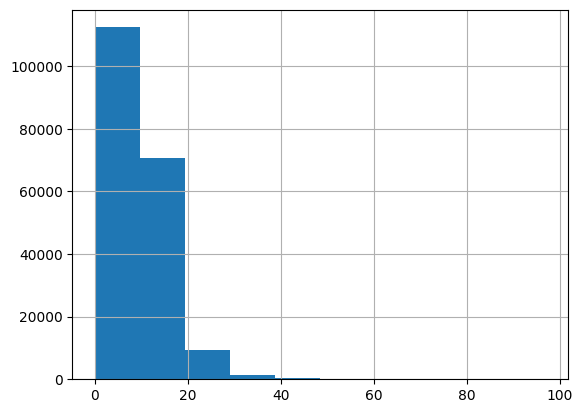

In [30]:
# distribution of n_steps
recipes.n_steps.hist()

<Axes: >

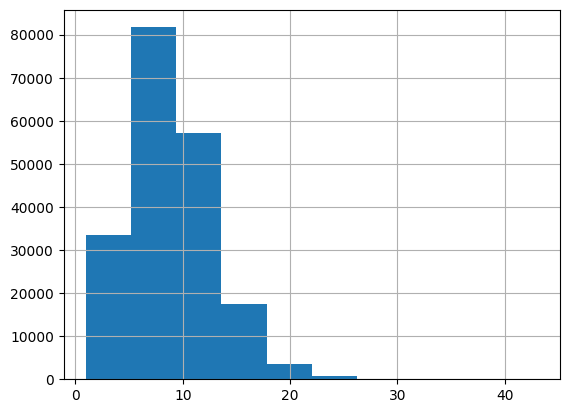

In [31]:
# distribution of n_ingredients
recipes.n_ingredients.hist()

In [32]:
recipes['food_types'] = np.nan
recipes['food_types'] = recipes['food_types'].astype('str')

In [33]:
for i in recipes['ingredients'].index:
    if 'eggs' not in recipes['ingredients'][i]:
         if 'ice-cream' in recipes['ingredients'][i] or 'chocolate' in recipes['ingredients'][i] or 'cookies' in recipes['ingredients'][i]:
                recipes['food_types'][i]='Veg dessert'
    elif 'eggs' in recipes['ingredients'][i]:
        if 'ice-cream' in recipes['ingredients'][i] or 'chocolate' in recipes['ingredients'][i] or 'cookies' in recipes['ingredients'][i]:
                recipes['food_types'][i]='Non-Veg dessert'

In [34]:
for i in recipes.index:
    if recipes['food_types'][i]!= 'Veg dessert' and recipes['food_types'][i]!= 'Non-Veg dessert' and 20<recipes['calories'][i]<300:
        recipes['food_types'][i]='Healthy'

In [35]:
for i in recipes.index:
    if recipes['food_types'][i]!= 'Veg dessert' and recipes['food_types'][i]!= 'Non-Veg dessert' and recipes['food_types'][i]!= 'Healthy':
        if 'chicken' in recipes['ingredients'][i] or 'eggs' in recipes['ingredients'][i] or 'ham' in recipes['ingredients'][i] or 'pepperoni' in recipes['ingredients'][i]:
            recipes['food_types'][i]='Non-veg'

In [36]:
for i in recipes.index:
    if recipes['food_types'][i]!= 'Veg dessert' and recipes['food_types'][i]!= 'Non-Veg dessert' and recipes['food_types'][i]!= 'Healthy' and recipes['food_types'][i]!= 'Non-veg':
        recipes['food_types'][i]='Veg'

In [37]:
recipes['food_types'].value_counts()

food_types
Healthy            93661
Veg                52065
Non-veg            36353
Veg dessert         7877
Non-Veg dessert     4128
Name: count, dtype: int64

In [38]:
recipes['food_types'].isnull().sum()

0

In [39]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,food_types
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,Healthy
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,Healthy
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,Healthy
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,Veg
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,Veg


# RAW Interactions Dataset

In [40]:
# read the interactions dataset
interactions = pd.read_csv('../dataset/RAW_interactions.csv')

In [41]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [42]:
# number of rows and columns
interactions.shape

(1132367, 5)

In [43]:
# missing values in the dataset in terms of percentage
interactions.isnull().sum() / interactions.shape[0] * 100

user_id      0.000000
recipe_id    0.000000
date         0.000000
rating       0.000000
review       0.014924
dtype: float64

In [44]:
# replace missing review with empty string
interactions.review = interactions.review.fillna('')

In [45]:
# number of unique users
print("Number of unique users: ", len(interactions.user_id.unique()))

Number of unique users:  226570


In [46]:
# number of unique recipes
print("Number of unique recipes: ", len(interactions.recipe_id.unique()))

Number of unique recipes:  231637


<Axes: >

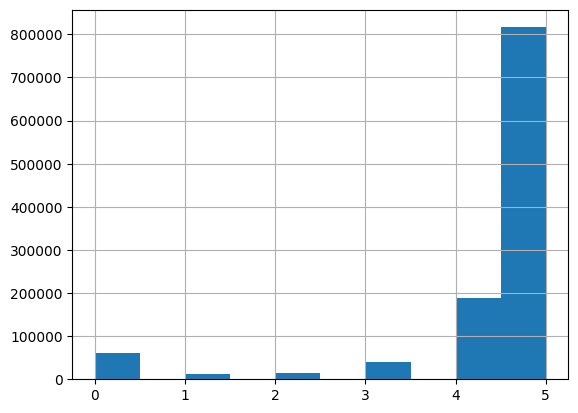

In [47]:
# distribution of ratings
interactions.rating.hist()

In [48]:
# check for unique recipe which are rated but not present in the recipes dataset

# get the list of unique recipe ids from the interactions dataset
unique_recipe_ids = set(interactions.recipe_id.unique())

# get the list of unique recipe ids from the recipes dataset
all_recipe_ids = set(recipes.id.unique())

# find the difference
missing_recipe_ids = unique_recipe_ids - all_recipe_ids
print("Number of missing recipes: ", len(missing_recipe_ids))
print("Number of recipes in the interactions dataset: ", len(unique_recipe_ids))
print("Number of recipes in the recipes dataset: ", len(all_recipe_ids))

Number of missing recipes:  37553
Number of recipes in the interactions dataset:  231637
Number of recipes in the recipes dataset:  194084


In [49]:
# since the recipes dataset is a subset of the interactions dataset, we can remove the missing recipes
interactions = interactions[~interactions.recipe_id.isin(missing_recipe_ids)]

In [50]:
interactions.shape

(942368, 5)

In [51]:
# merge the recipes and interactions dataset using recipe_id from the interactions dataset and id from the recipes dataset
interactions = interactions.merge(recipes, how='left', left_on='recipe_id', right_on='id')

In [52]:
interactions.head()

,user_id,recipe_id,date,rating,review,name,id,minutes,contributor_id,submitted,...,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,food_types
0,76535,134728,2005-09-02,4,Very good!,kfc honey bbq strips,134728,40,166019,2005-08-24,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
1,273745,134728,2005-12-22,5,Better than the real!!,kfc honey bbq strips,134728,40,166019,2005-08-24,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
2,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,kfc honey bbq strips,134728,40,166019,2005-08-24,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
3,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...,kfc honey bbq strips,134728,40,166019,2005-08-24,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
4,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...,kfc honey bbq strips,134728,40,166019,2005-08-24,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg


In [53]:
# shape
interactions.shape

(942368, 24)

In [54]:
# missing values in the dataset in terms of percentage
interactions.isnull().sum() / interactions.shape[0] * 100

user_id           0.0
recipe_id         0.0
date              0.0
rating            0.0
review            0.0
name              0.0
id                0.0
minutes           0.0
contributor_id    0.0
submitted         0.0
tags              0.0
n_steps           0.0
steps             0.0
description       0.0
ingredients       0.0
n_ingredients     0.0
calories          0.0
total_fat         0.0
sugar             0.0
sodium            0.0
protein           0.0
saturated_fat     0.0
carbohydrates     0.0
food_types        0.0
dtype: float64

In [55]:
# drop the id column
interactions.drop('id', axis=1, inplace=True)

In [56]:
# save the dataset
interactions.to_csv('../dataset/preprocessed_interactions.csv', index=False)

# Cleaning text attributes

In [57]:
df = pd.read_csv('../dataset/preprocessed_interactions.csv')
df

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,...,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,food_types
0,76535,134728,2005-09-02,4,Very good!,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
1,273745,134728,2005-12-22,5,Better than the real!!,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
2,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
3,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
4,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942363,102526,54493,2007-04-26,0,I am not going to rate this because I did have...,garlic clove chicken,65,49304,2003-02-21,"['weeknight', 'time-to-make', 'course', 'main-...",...,"['chicken', 'garlic', 'dry white wine', 'lemon...",6,338.3,32.0,1.0,7.0,53.0,29.0,2.0,Non-veg
942364,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...,stacey e s yummy veggie burgers,21,742029,2009-08-24,"['30-minutes-or-less', 'time-to-make', 'course...",...,"['carrot', 'garbanzo beans', 'salsa', 'corn fl...",8,124.7,1.0,11.0,24.0,10.0,0.0,8.0,Healthy
942365,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...,pot roast with port stove top,115,108291,2003-12-05,"['weeknight', 'time-to-make', 'course', 'prepa...",...,"['boneless beef chuck roast', 'olive oil', 'ta...",10,828.2,87.0,22.0,20.0,93.0,112.0,4.0,Veg
942366,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...,pot roast with port stove top,115,108291,2003-12-05,"['weeknight', 'time-to-make', 'course', 'prepa...",...,"['boneless beef chuck roast', 'olive oil', 'ta...",10,828.2,87.0,22.0,20.0,93.0,112.0,4.0,Veg


In [58]:
df
# integer encoding for user_id and recipe_id
df['user_id'] = df['user_id'].astype('category').cat.codes.values
df['recipe_id'] = df['recipe_id'].astype('category').cat.codes.values

In [59]:
df

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,...,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,food_types
0,7708,60599,2005-09-02,4,Very good!,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
1,27707,60599,2005-12-22,5,Better than the real!!,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
2,35308,60599,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
3,19399,60599,2007-03-09,5,These taste absolutely wonderful!! My son-in-...,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
4,43887,60599,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942363,10188,22092,2007-04-26,0,I am not going to rate this because I did have...,garlic clove chicken,65,49304,2003-02-21,"['weeknight', 'time-to-make', 'course', 'main-...",...,"['chicken', 'garlic', 'dry white wine', 'lemon...",6,338.3,32.0,1.0,7.0,53.0,29.0,2.0,Non-veg
942364,51769,161871,2009-09-29,5,These were so delicious! My husband and I tru...,stacey e s yummy veggie burgers,21,742029,2009-08-24,"['30-minutes-or-less', 'time-to-make', 'course...",...,"['carrot', 'garbanzo beans', 'salsa', 'corn fl...",8,124.7,1.0,11.0,24.0,10.0,0.0,8.0,Healthy
942365,15786,33054,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...,pot roast with port stove top,115,108291,2003-12-05,"['weeknight', 'time-to-make', 'course', 'prepa...",...,"['boneless beef chuck roast', 'olive oil', 'ta...",10,828.2,87.0,22.0,20.0,93.0,112.0,4.0,Veg
942366,5051,33054,2009-01-11,4,Very good! I used regular port as well. The ...,pot roast with port stove top,115,108291,2003-12-05,"['weeknight', 'time-to-make', 'course', 'prepa...",...,"['boneless beef chuck roast', 'olive oil', 'ta...",10,828.2,87.0,22.0,20.0,93.0,112.0,4.0,Veg


In [60]:
def clean_review(review):
    # convert to string
    review = str(review)
    # expand contractions
    review = contractions.fix(review)
    # convert to lowercase
    review = review.lower()
    # remove trailing and leading spaces
    review = review.strip()
    # replace - with space
    review = re.sub(r'-', ' ', review)
    # remove punctuation
    review = re.sub(r'[^\w\s\\.]', '', review)
    # remove multiple spaces
    review = re.sub(r'\s+', ' ', review)
    return review

clean_review(df['review'][3])

'these taste absolutely wonderful my son in law loves them and requests them often i followed the recipe exactly. thanks so much for posting this recipe.'

In [61]:
df['review'] = df['review'].apply(clean_review)

In [62]:
len(df['review'])

942368

In [63]:
# first 5 reviews
for review in df['review'][:5]:
    print(review + "\n")

very good

better than the real

absolutely awesome i was speechless when i tried them. i have never had such juicy melt in your mouth chicken made at home i would however suggest to reduce the amount of flour. 2 cups was overkill for me.

these taste absolutely wonderful my son in law loves them and requests them often i followed the recipe exactly. thanks so much for posting this recipe.

made my own buttermilk w vinegar and milk. used defrosted fresh skinlessboneless chicken fillets. 3 lbs. this mix is extremely flavorful and its light . i did not do the bbq thing but while i cooked homemade to go w this i put the chicken in the oven to keep warm and served bbq dipping sauce. 10 stars from my kids 



In [64]:
import nltk
nltk.download('vader_lexicon') # download the necessary lexicon for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

reviews = []
for review in df['review']:
    reviews.append(review)
    
sia = SentimentIntensityAnalyzer()

df['sentiment'] = df['review'].apply(lambda x: sia.polarity_scores(x))

# Extract the sentiment scores from the dictionary and add them as separate columns to the dataframe
df['negative'] = df['sentiment'].apply(lambda x: x['neg'])
df['neutral'] = df['sentiment'].apply(lambda x: x['neu'])
df['positive'] = df['sentiment'].apply(lambda x: x['pos'])
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vinitkanani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [65]:
df = df.drop(['sentiment'], axis=1)
df.head(5)

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,...,sugar,sodium,protein,saturated_fat,carbohydrates,food_types,negative,neutral,positive,compound
0,7708,60599,2005-09-02,4,very good,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,40.0,37.0,78.0,4.0,10.0,Non-veg,0.0,0.238,0.762,0.4927
1,27707,60599,2005-12-22,5,better than the real,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,40.0,37.0,78.0,4.0,10.0,Non-veg,0.0,0.508,0.492,0.4404
2,35308,60599,2006-09-26,5,absolutely awesome i was speechless when i tri...,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,40.0,37.0,78.0,4.0,10.0,Non-veg,0.0,0.883,0.117,0.6590
3,19399,60599,2007-03-09,5,these taste absolutely wonderful my son in law...,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,40.0,37.0,78.0,4.0,10.0,Non-veg,0.0,0.675,0.325,0.8908
4,43887,60599,2008-02-20,0,made my own buttermilk w vinegar and milk. use...,kfc honey bbq strips,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,40.0,37.0,78.0,4.0,10.0,Non-veg,0.0,0.929,0.071,0.4588


In [66]:
for ingredient in df['ingredients'][:5]:
    print(ingredient + "\n")

['chicken tenders', 'flour', 'garlic powder', 'salt', 'ground pepper', 'buttermilk', 'vegetable oil', 'hickory flavored barbecue sauce', 'water', 'honey', 'ketchup', 'liquid smoke']

['chicken tenders', 'flour', 'garlic powder', 'salt', 'ground pepper', 'buttermilk', 'vegetable oil', 'hickory flavored barbecue sauce', 'water', 'honey', 'ketchup', 'liquid smoke']

['chicken tenders', 'flour', 'garlic powder', 'salt', 'ground pepper', 'buttermilk', 'vegetable oil', 'hickory flavored barbecue sauce', 'water', 'honey', 'ketchup', 'liquid smoke']

['chicken tenders', 'flour', 'garlic powder', 'salt', 'ground pepper', 'buttermilk', 'vegetable oil', 'hickory flavored barbecue sauce', 'water', 'honey', 'ketchup', 'liquid smoke']

['chicken tenders', 'flour', 'garlic powder', 'salt', 'ground pepper', 'buttermilk', 'vegetable oil', 'hickory flavored barbecue sauce', 'water', 'honey', 'ketchup', 'liquid smoke']



In [67]:
# number of unique ingredients
ingredient_list = [ingredient_list.split(',') for ingredient_list in df.ingredients]
ingredient_list = [item.strip() for sublist in ingredient_list for item in sublist]
# remove special characters except - and " "
ingredient_list = [re.sub('[^A-Za-z0-9\s\-"]+', '', ingredient) for ingredient in ingredient_list]
# remove double quotes
ingredient_list = [re.sub('"', '', ingredient) for ingredient in ingredient_list]
print("Number of unique ingredients: ", len(set(ingredient_list)))

Number of unique ingredients:  14130


In [68]:
ingredient_list[:10]

['chicken tenders',
 'flour',
 'garlic powder',
 'salt',
 'ground pepper',
 'buttermilk',
 'vegetable oil',
 'hickory flavored barbecue sauce',
 'water',
 'honey']

In [69]:
def encode_ingredients(ingredients):
    ingredients = ingredients.split(',')
    ingredients = [ingredient.strip() for ingredient in ingredients]
    ingredients = [re.sub('[^A-Za-z0-9\s\-"]+', '', ingredient) for ingredient in ingredients]
    ingredients = [re.sub('"', '', ingredient) for ingredient in ingredients]
    return ', '.join(ingredients)

encode_ingredients(df['ingredients'][0])

'chicken tenders, flour, garlic powder, salt, ground pepper, buttermilk, vegetable oil, hickory flavored barbecue sauce, water, honey, ketchup, liquid smoke'

In [70]:
df['ingredients'] = df['ingredients'].apply(encode_ingredients)

In [71]:
# number of unique tags
tag_list = [tag_list.split(',') for tag_list in df.tags]
tag_list = [item.strip() for sublist in tag_list for item in sublist]
# remove special characters except - and " "
tag_list = [re.sub('[^A-Za-z0-9\s\-"]+', '', tag) for tag in tag_list]
# remove double quotes
tag_list = [re.sub('"', '', tag) for tag in tag_list]
print("Number of unique tags: ", len(set(tag_list)))

Number of unique tags:  512


In [72]:
def encode_tags(tag):
    tag = tag.split(',')
    tag = [tag.strip() for tag in tag]
    tag = [re.sub('[^A-Za-z0-9\s\-"]+', '', tag) for tag in tag]
    tag = [re.sub('"', '', tag) for tag in tag]
    return ', '.join(tag)

encode_tags(df['tags'][0])

'60-minutes-or-less, time-to-make, main-ingredient, preparation, healthy, poultry, low-fat, chicken, dietary, low-saturated-fat, high-protein, high-in-something, low-in-something, meat'

In [73]:
df['tags'] = df['tags'].apply(encode_tags)

In [74]:
for step in df['steps'][:5]:
    print(step + "\n")

['mix flour , salt and pepper in bowl', 'set aside', 'place buttermilk in seperate bowl', 'heat oil for frying and dips chicken strips in flour then in buttermilk and then in flour again', 'place in hot oil and fry until lightly golden brown', 'remove strips and drain', 'place all bbq sauce ingredients in a small sauce pan and simmer on low stirring frequently for 20 minutes', 'let sauce cool', 'dip one chicken strip in sauce at a time and place in a baking pan that has been sprayed lightly with a non stick spray', 'place in a preheated oven at 350 and bake for 20 minutes']

['mix flour , salt and pepper in bowl', 'set aside', 'place buttermilk in seperate bowl', 'heat oil for frying and dips chicken strips in flour then in buttermilk and then in flour again', 'place in hot oil and fry until lightly golden brown', 'remove strips and drain', 'place all bbq sauce ingredients in a small sauce pan and simmer on low stirring frequently for 20 minutes', 'let sauce cool', 'dip one chicken str

In [75]:
def clean_steps(steps):
    steps = steps.replace(' ,', ',')
    steps = [step for step in steps.split('\',')]
    steps = [step.strip() for step in steps]
    steps = [re.sub('[^A-Za-z0-9\s\-\,"]+', '', step) for step in steps]
    steps = [re.sub('"', '', step) for step in steps]
    return '\n'.join(steps)

clean_steps(df['steps'][0])

'mix flour, salt and pepper in bowl\nset aside\nplace buttermilk in seperate bowl\nheat oil for frying and dips chicken strips in flour then in buttermilk and then in flour again\nplace in hot oil and fry until lightly golden brown\nremove strips and drain\nplace all bbq sauce ingredients in a small sauce pan and simmer on low stirring frequently for 20 minutes\nlet sauce cool\ndip one chicken strip in sauce at a time and place in a baking pan that has been sprayed lightly with a non stick spray\nplace in a preheated oven at 350 and bake for 20 minutes'

In [76]:
df['steps'] = df['steps'].apply(clean_steps)

In [77]:
for step in df['steps'][:5]:
    print(step + "\n")

mix flour, salt and pepper in bowl
set aside
place buttermilk in seperate bowl
heat oil for frying and dips chicken strips in flour then in buttermilk and then in flour again
place in hot oil and fry until lightly golden brown
remove strips and drain
place all bbq sauce ingredients in a small sauce pan and simmer on low stirring frequently for 20 minutes
let sauce cool
dip one chicken strip in sauce at a time and place in a baking pan that has been sprayed lightly with a non stick spray
place in a preheated oven at 350 and bake for 20 minutes

mix flour, salt and pepper in bowl
set aside
place buttermilk in seperate bowl
heat oil for frying and dips chicken strips in flour then in buttermilk and then in flour again
place in hot oil and fry until lightly golden brown
remove strips and drain
place all bbq sauce ingredients in a small sauce pan and simmer on low stirring frequently for 20 minutes
let sauce cool
dip one chicken strip in sauce at a time and place in a baking pan that has be

In [78]:
# number of unique steps
step_list = [step_list.split('\n') for step_list in df.steps]
step_list = [item.strip() for sublist in step_list for item in sublist]
# replace "'" with ""
step_list = [re.sub("'", '', step) for step in step_list]
print("Number of unique steps: ", len(set(step_list)))

Number of unique steps:  1439684


In [79]:
def clean_name(name):
    name = name.lower()
    name = name.strip()
    name = re.sub('[^A-Za-z0-9\s]+', '', name)
    return name

clean_name(df['name'][0])

'kfc honey bbq strips'

In [80]:
df['name'] = df['name'].apply(clean_name)

In [81]:
df.to_csv('../dataset/preprocessed_data.csv', index=False)